In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

In [2]:
module_path = os.path.abspath(os.path.join('..', 'eval_utils'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

from eval_utils import DataAnalysis, DataQualityReport

/Users/Daniel/Documents/CS/Research Practicum/comp47360-group8/ml_pipeline/data_evaluation/eval_utils


In [3]:
df = pd.read_csv('osm_places_amenity.csv')

threshold = int(0.03* df.shape[0])
df = df.dropna(axis=1, thresh=threshold)

/var/folders/6q/d_h4k1216h90crzgkghkzc9r0000gp/T/ipykernel_9446/3000964665.py:1: DtypeWarning: Columns (47,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('osm_places_amenity.csv')


In [4]:
da = DataAnalysis("osm_places_amenity", df)

Number of rows: 14647
Number of cols: 46



Column types:
id: int64
lat: float64
lon: float64
addr:city: object
addr:housenumber: object
addr:postcode: object
addr:state: object
addr:street: object
amenity: object
branch: object
brand: object
brand:wikidata: object
cuisine: object
drive_through: object
name: object
official_name: object
opening_hours: object
phone: object
takeaway: object
website: object
outdoor_seating: object
cocktails: object
drink:beer: object
drink:liquor: object
drink:wine: object
wheelchair: object
check_date: object
payment:cash: object
payment:credit_cards: object
email: object
alt_name: object
ref: object
internet_access: object
level: object
diet:vegan: object
diet:vegetarian: object
toilets: object
drink:coffee: object
drink:tea: object
smoking: object
bar: object
contact:instagram: object
delivery: object
drink:espresso: object
reservation: object
indoor_seating: object


 Convert column types to desired ones before continuing


Number of duplicate rows: 0
id 0
lat 0
lon 0
addr:city 9684
addr:housenumber 4565
addr:postcode 6817
addr:state 10039
addr:street 4442
amenity 0
branch 13909
brand 12575
brand:wikidata 12627
cuisine 4620
drive_through 13740
name 212
official_name 14169
opening_hours 7649
phone 7006
takeaway 10489
website 7841
outdoor_seating 12124
cocktails 13642
drink:beer 13217
drink:liquor 13809
drink:wine 13337
wheelchair 12770
check_date 13717
payment:cash 13988
payment:credit_cards 14071
email 14051
alt_name 13871
ref 14099
internet_access 13834
level 13652
diet:vegan 14163
diet:vegetarian 14031
toilets 13913
drink:coffee 13673
drink:tea 14169
smoking 14126
bar 14154
contact:instagram 14188
delivery 12502
drink:espresso 14128
reservation 14025
indoor_seating 14001


Value proportions:
addr:city
NaN               0.661159
New York          0.168977
Brooklyn          0.073599
Bronx             0.012084
Jamaica           0.010924
                    ...   
Richmond Hills    0.000068
Laurelton       

<Figure size 640x480 with 0 Axes>

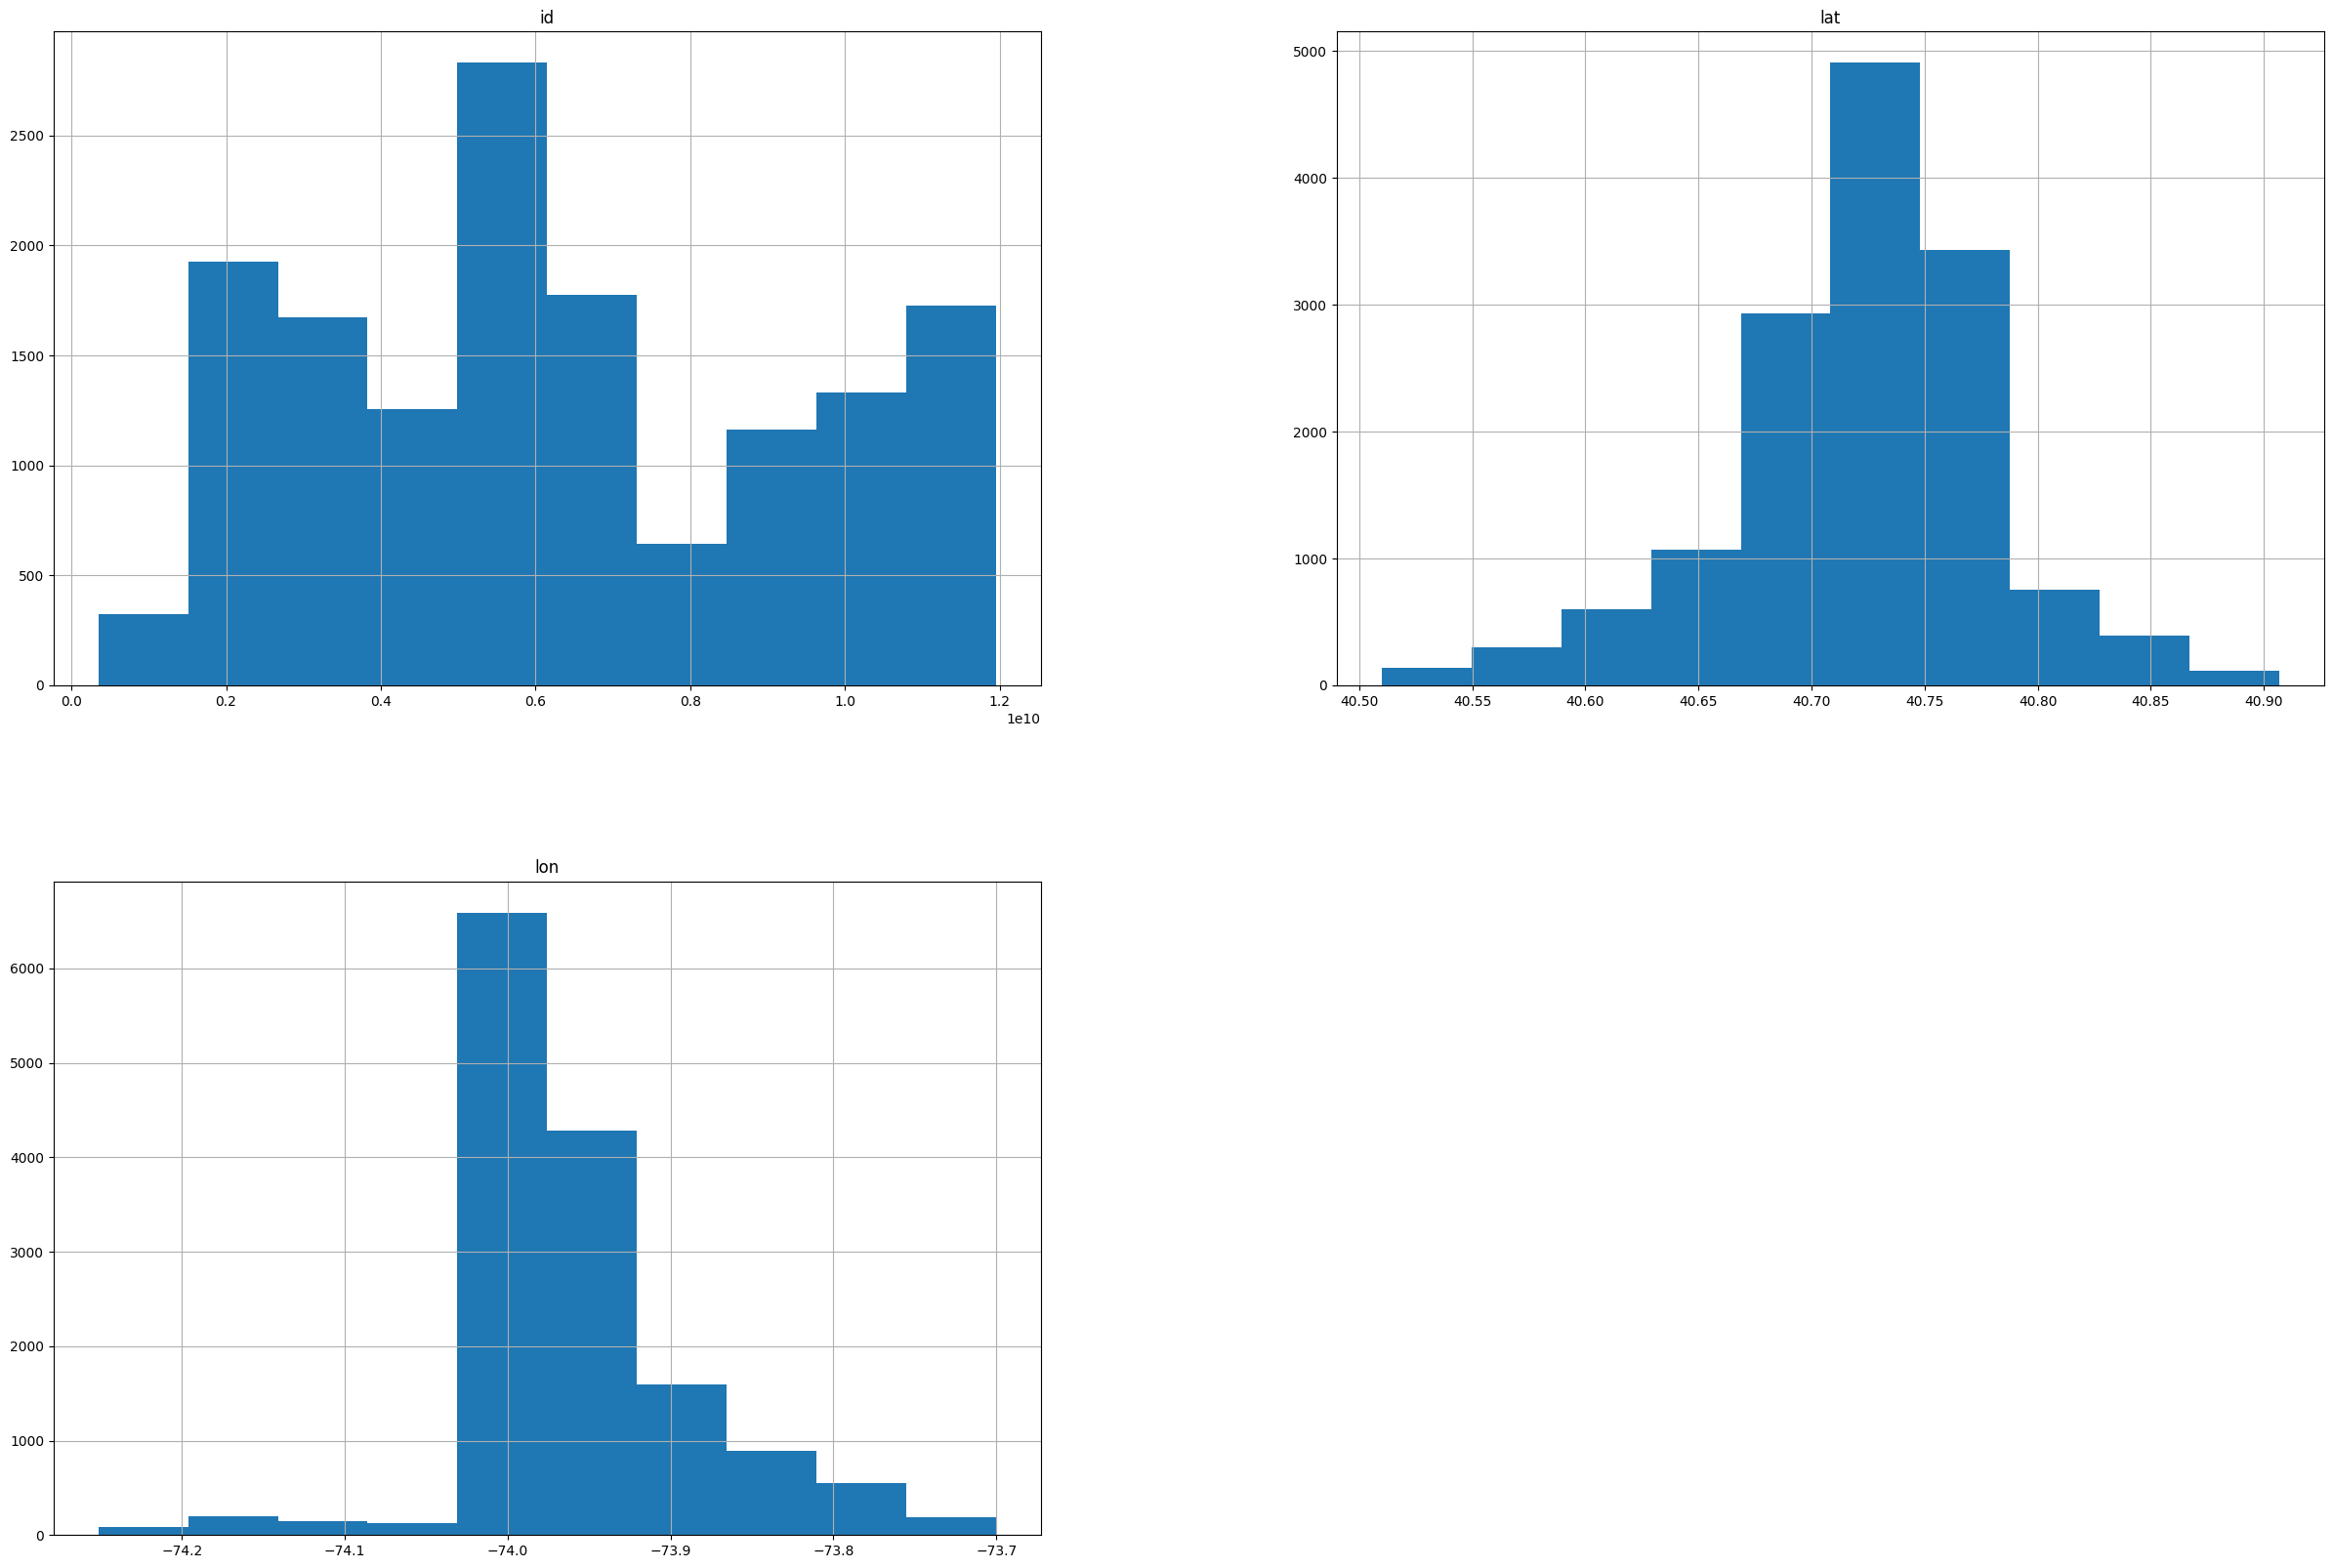

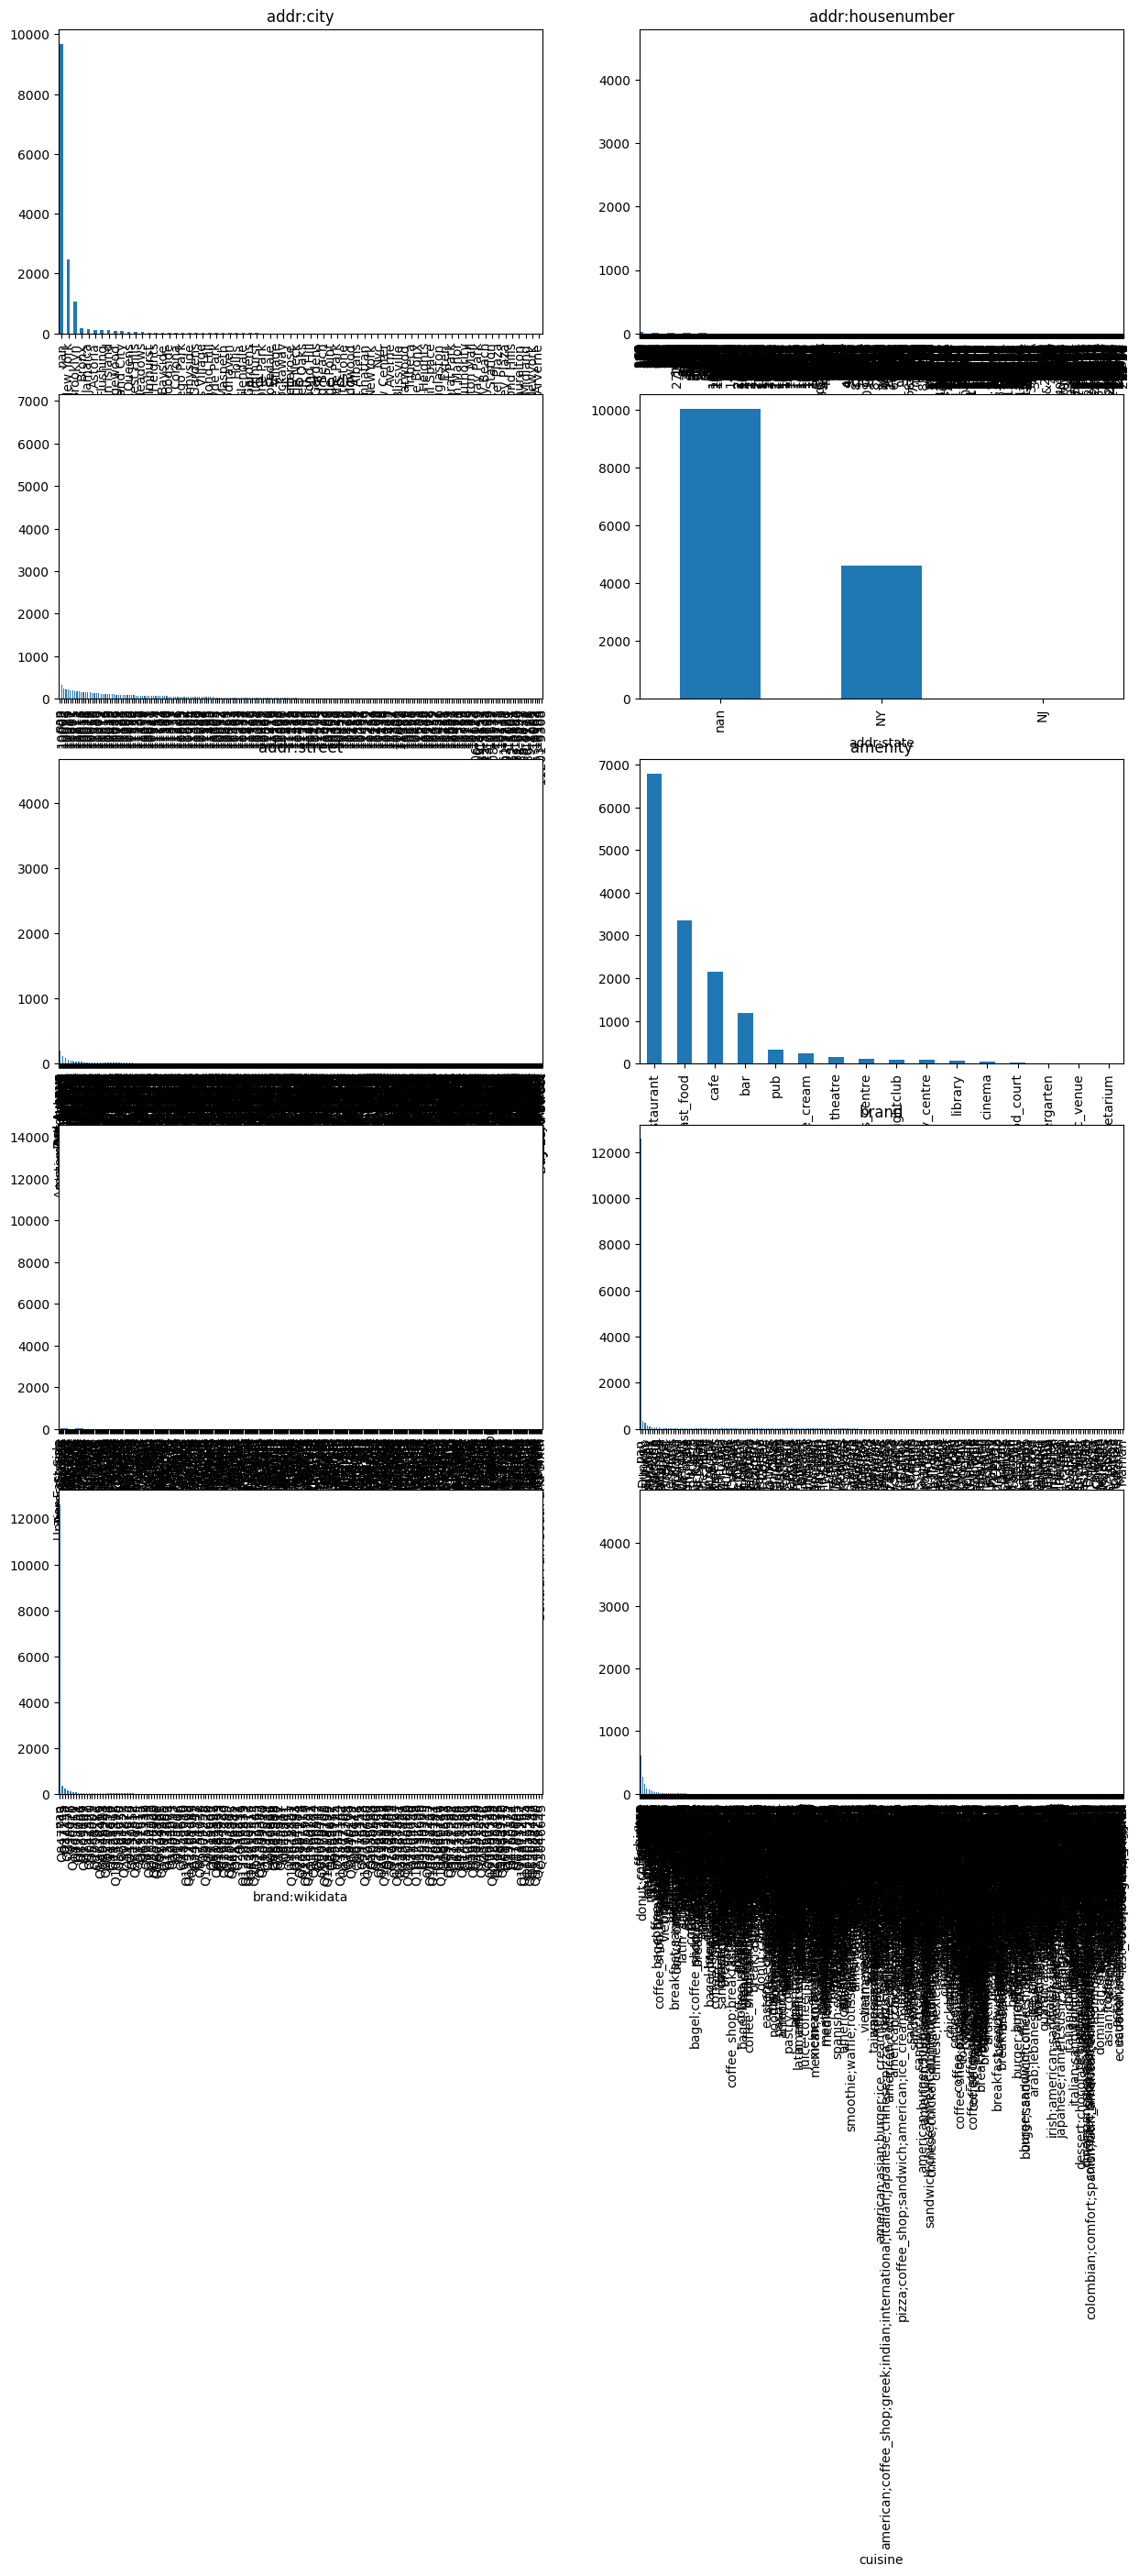

/Users/Daniel/Documents/CS/Research Practicum/comp47360-group8/ml_pipeline/data_evaluation/eval_utils/eval_utils.py:202: UserWarning: Glyph 22812 (\N{CJK UNIFIED IDEOGRAPH-591C}) missing from font(s) DejaVu Sans.
  plt.savefig(f)
/Users/Daniel/Documents/CS/Research Practicum/comp47360-group8/ml_pipeline/data_evaluation/eval_utils/eval_utils.py:202: UserWarning: Glyph 23476 (\N{CJK UNIFIED IDEOGRAPH-5BB4}) missing from font(s) DejaVu Sans.
  plt.savefig(f)
/Users/Daniel/Documents/CS/Research Practicum/comp47360-group8/ml_pipeline/data_evaluation/eval_utils/eval_utils.py:202: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) DejaVu Sans.
  plt.savefig(f)
/Users/Daniel/Documents/CS/Research Practicum/comp47360-group8/ml_pipeline/data_evaluation/eval_utils/eval_utils.py:202: UserWarning: Glyph 24220 (\N{CJK UNIFIED IDEOGRAPH-5E9C}) missing from font(s) DejaVu Sans.
  plt.savefig(f)
/Users/Daniel/Documents/CS/Research Practicum/comp47360-group8/ml_pipeline/data_

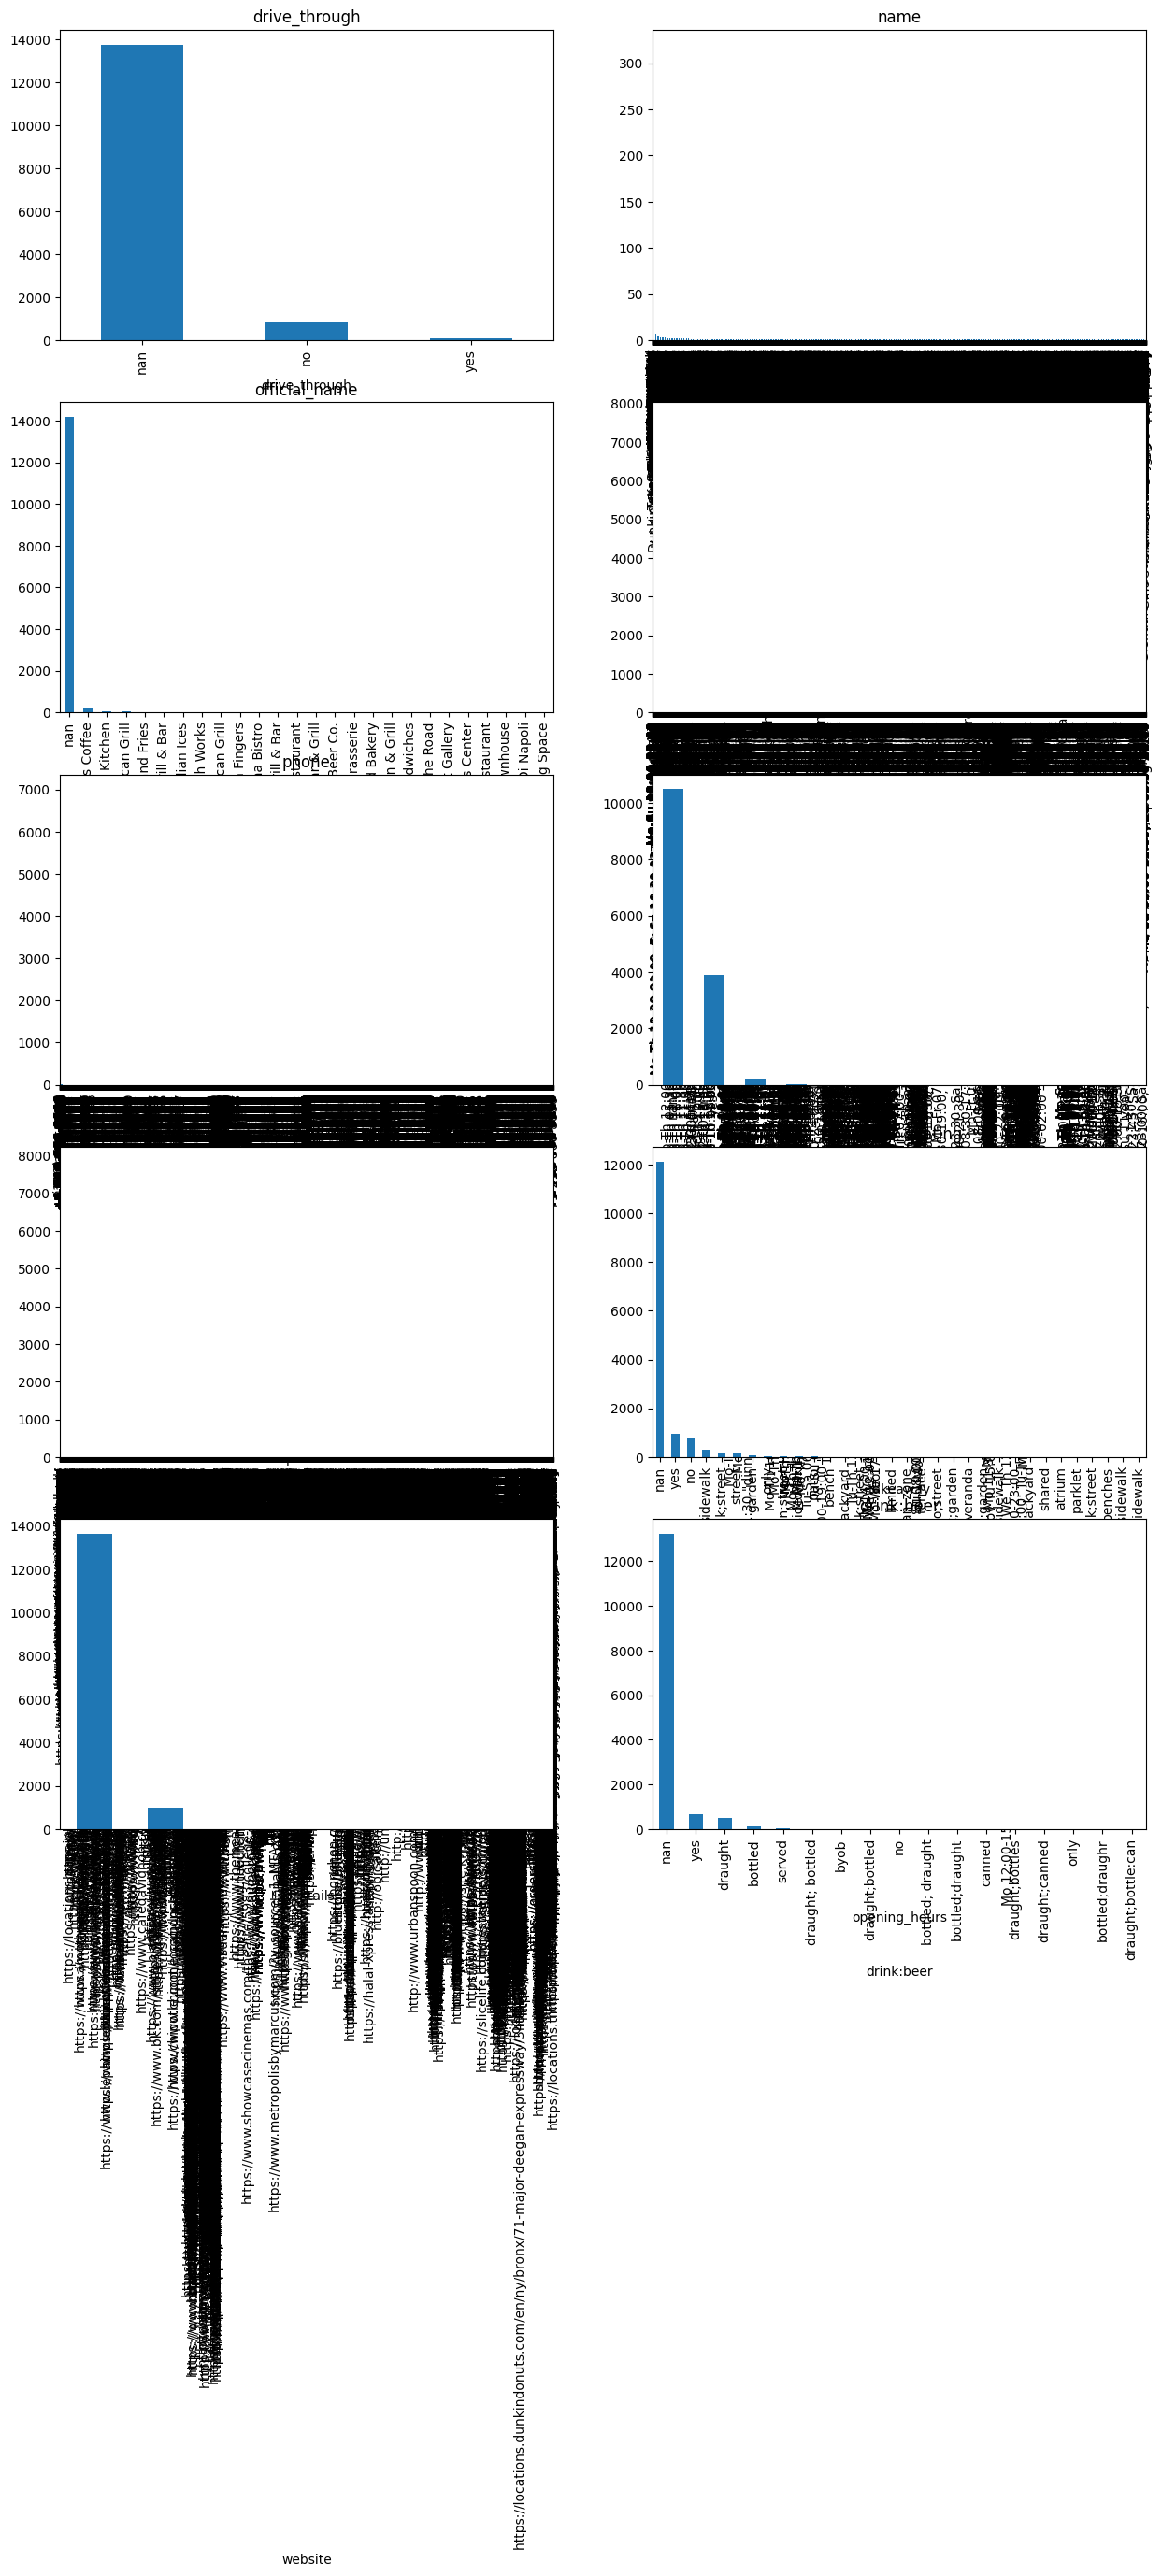

/Users/Daniel/Documents/CS/Research Practicum/comp47360-group8/ml_pipeline/data_evaluation/eval_utils/eval_utils.py:202: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  plt.savefig(f)
/Users/Daniel/Documents/CS/Research Practicum/comp47360-group8/ml_pipeline/data_evaluation/eval_utils/eval_utils.py:202: UserWarning: Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from font(s) DejaVu Sans.
  plt.savefig(f)
/Users/Daniel/Documents/CS/Research Practicum/comp47360-group8/ml_pipeline/data_evaluation/eval_utils/eval_utils.py:202: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.savefig(f)
/Users/Daniel/anaconda3/envs/comp47360/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Daniel/anaconda3/envs/comp47360/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarn

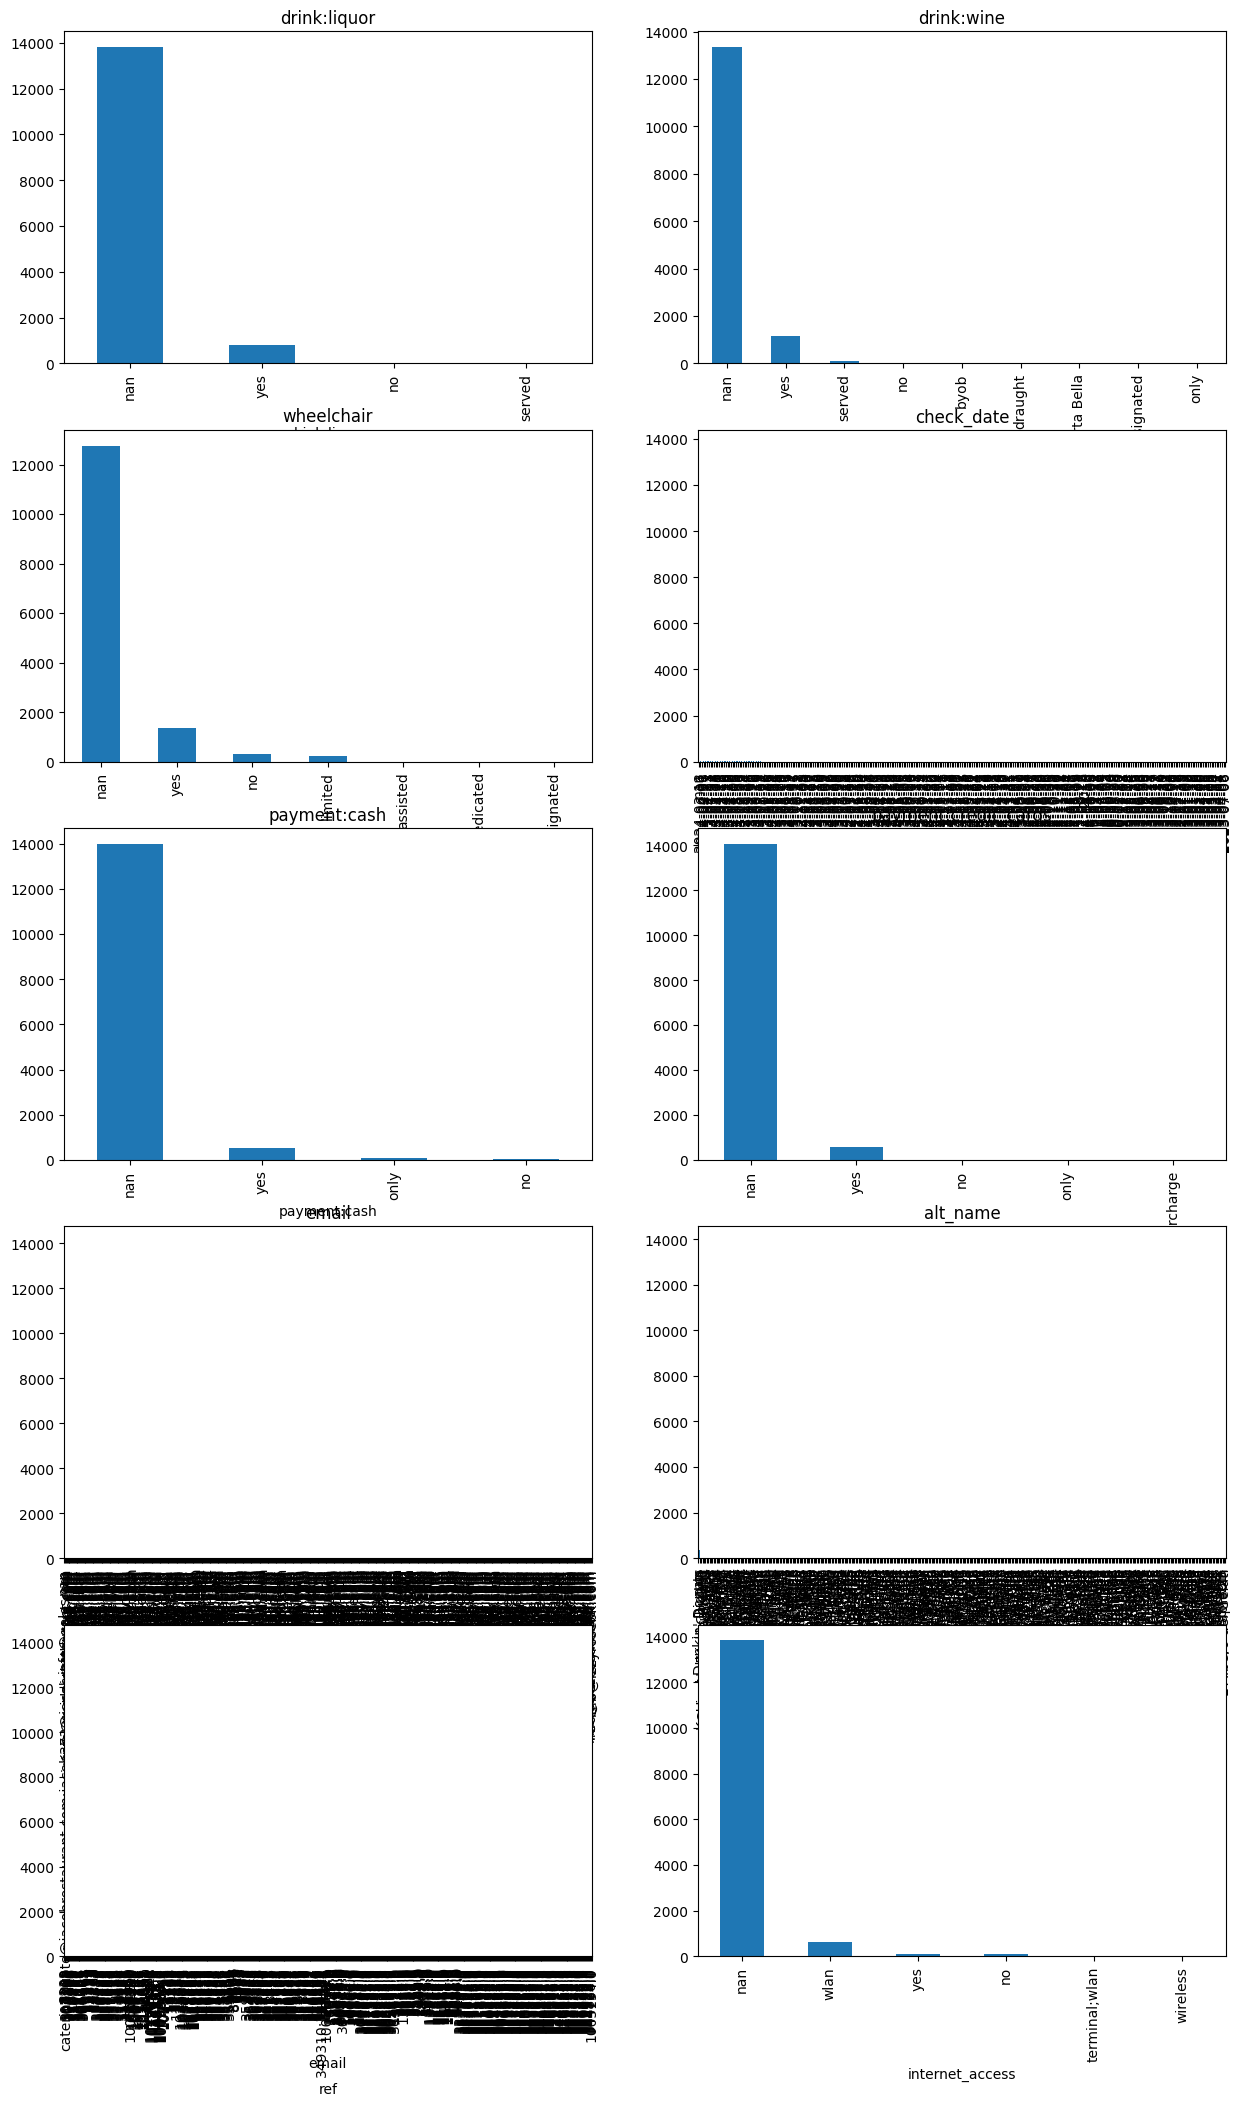

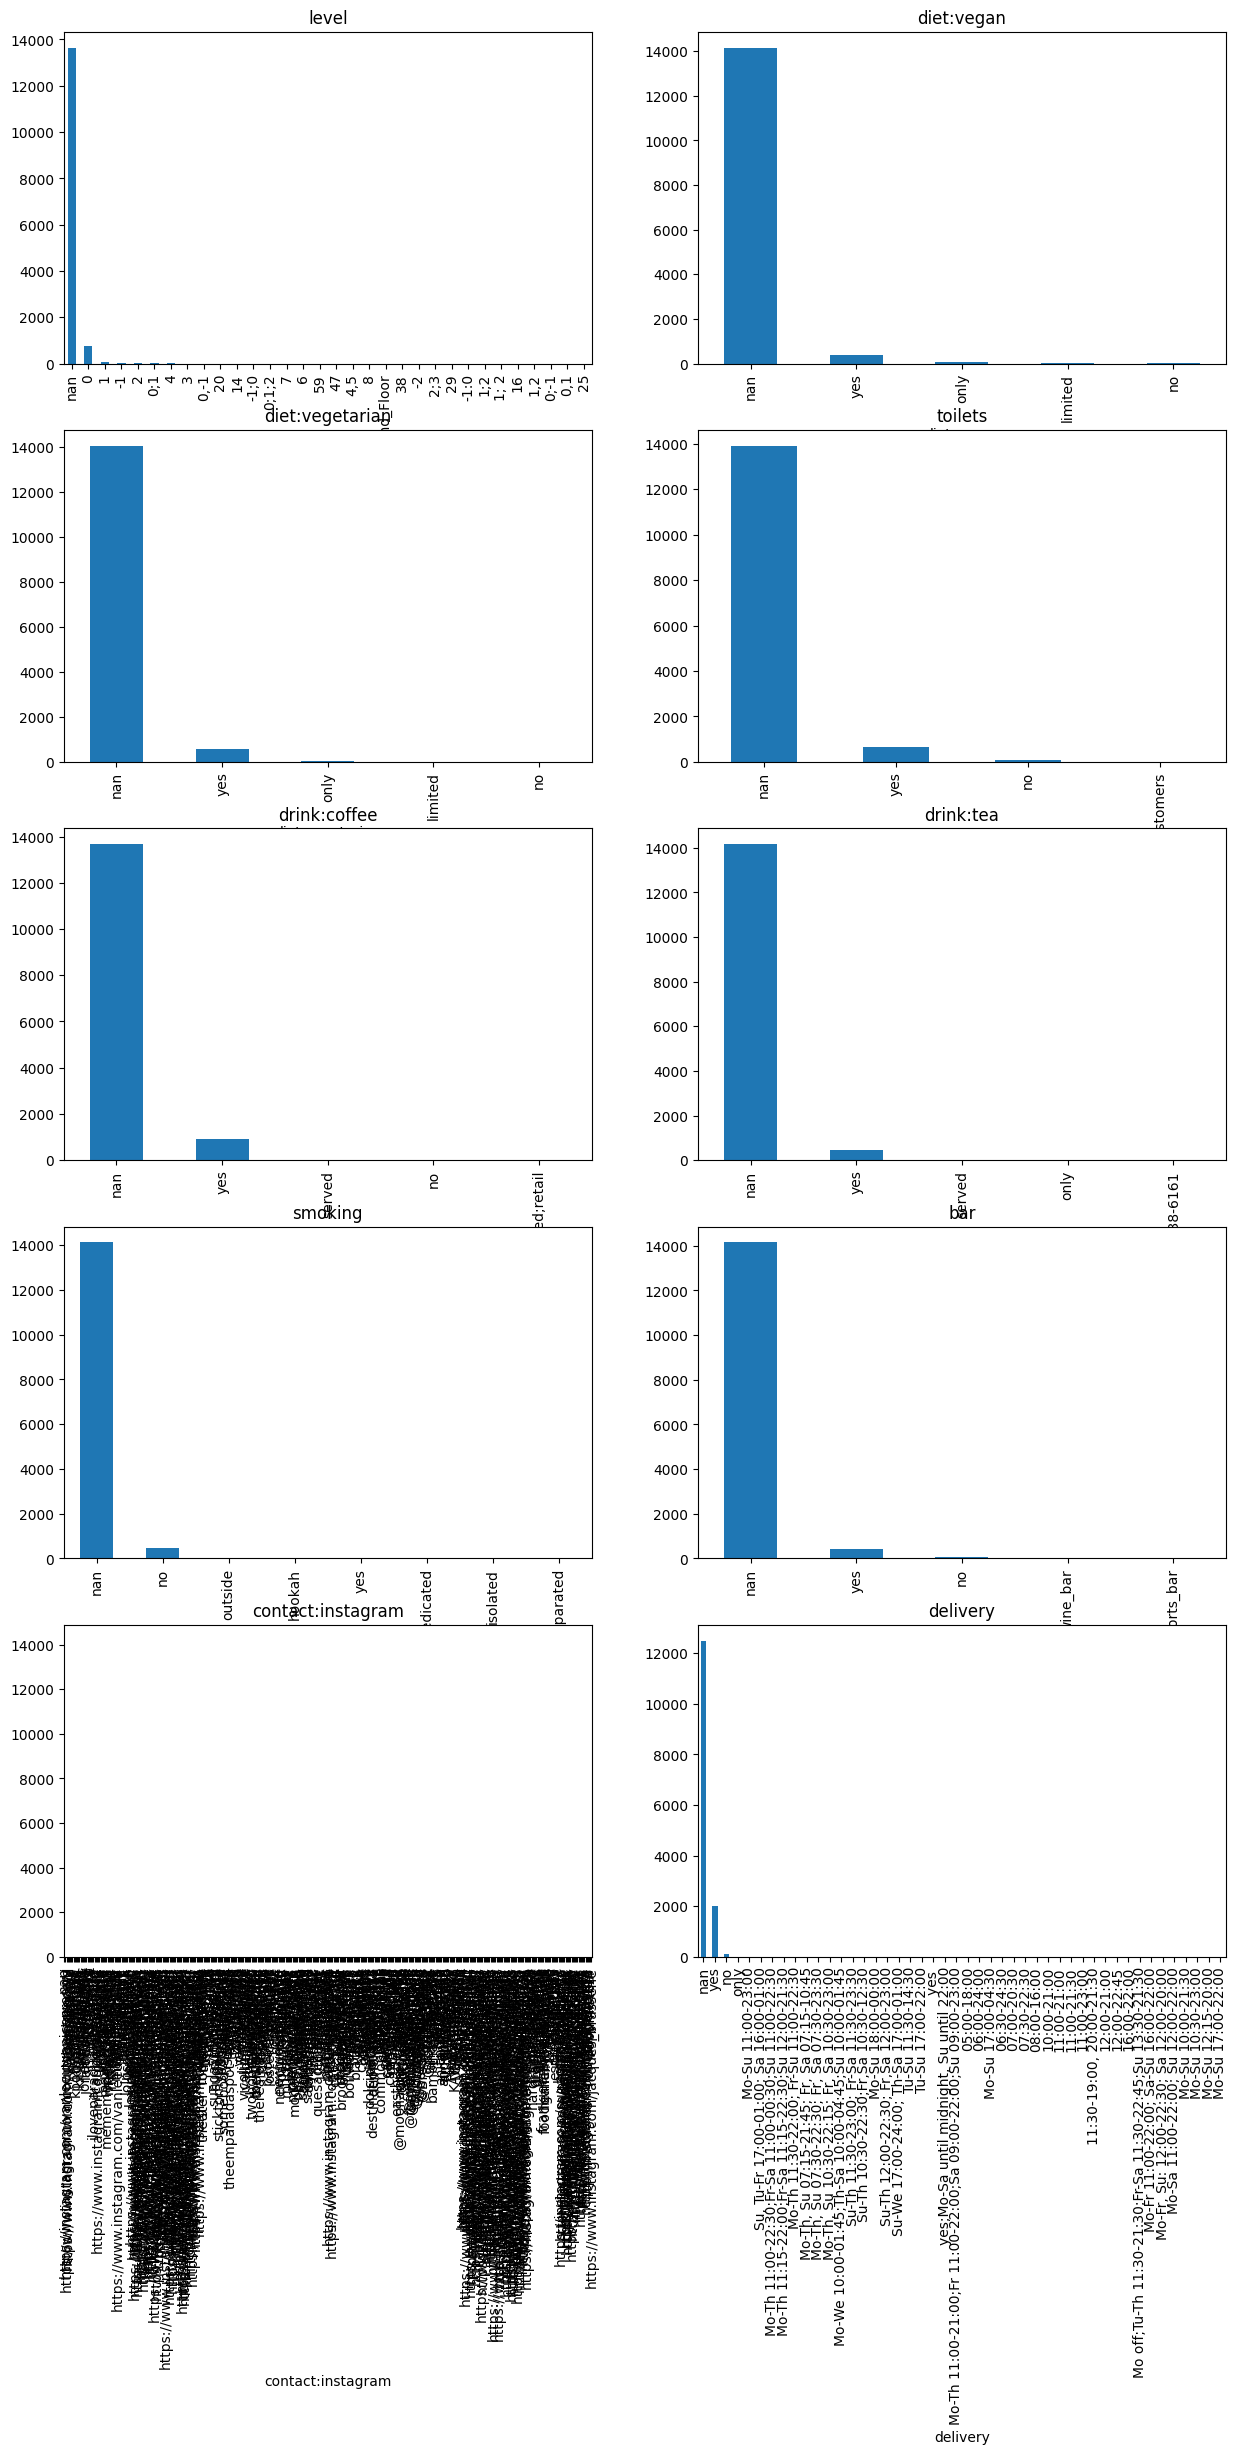

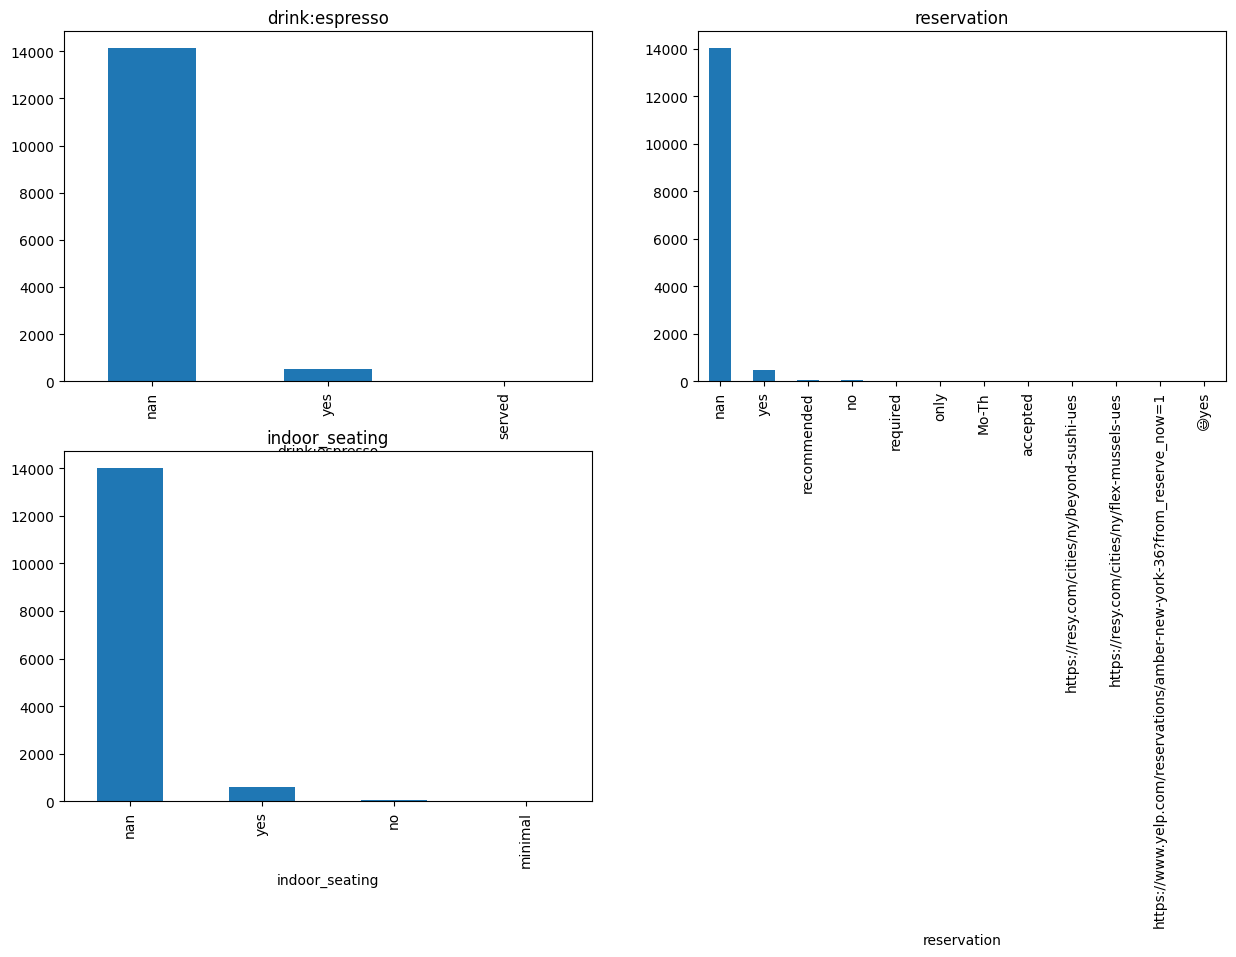

In [5]:
da.analyse()

In [13]:
from docx import Document
from docx.shared import Inches
import humanize

In [20]:
class DataQualityReport:
    critical_params = ['title', 'description', 'source', 'source_link', 'detailed_desc']
    sig_digits = 5 
    drop_feature_cutoff = 50 #% of missing values allowed before feature is dropped
    def __init__(self, da: DataAnalysis, params: dict):
        self.da = da
        self.params = params
        # make sure all critical parameters are present
        for param in self.critical_params:
            if param not in params:
                raise ValueError(f"The required value {param} is missing from parameters")
        
        # Get the columns that contain null values
        self.null_val_cols = []
        for col in da.num_null_vals:
            if da.num_null_vals[col] > 0:
                self.null_val_cols.append(col)
    
    def num_format(self, num):
        return f'%.{self.sig_digits}g' % num

    def write_missing_vals_overview(self):

        if len(self.null_val_cols) == 0:
            return "The dataset contains no missing values. "
        
        if len(self.null_val_cols) == 1:
            return f"The feature {self.null_val_cols[0]} contains missing values. "

        if len(self.null_val_cols)>5:
            return f"{len(self.null_val_cols)} features contain missing values. "
        
        output = "The features "
        for col in self.null_val_cols:
            output += f"{col}, "
        
        output = output[:-2] + " contain missing values."

    def write_df_shape(self):
        return f"The dataset has {self.da.num_cols} features and {self.da.num_rows} rows. "
    
    def write_missing_values_summary(self):
        dropped_features = []
        for col in self.null_val_cols:
            if da.df_category_perc_missing.loc[col, '%missing']>50:
                dropped_features.append(col)
            
        if len(dropped_features) == 0:
            return "No features will have to be dropped due to missing values. "
        
        if len(dropped_features) < 5:
            output = ""
            for feature in dropped_features:
                output += f"{feature}, "
            output = output[:-2] + " will have to be dropped due to missing values. "
            return output
        
        return f"{len(dropped_features)} features will have to be dropped due to missing values. "

    def write_duplicate_rows(self):
        if(self.da.duplicate_count == 0):
            return "There are no duplicate rows. "

        return f"There are {self.da.duplicate_count} duplicate rows. "
    
    def numeric_col_description(self, col):
        output = f"This feature has a mean of {self.num_format(da.df_table_numeric.loc[col, 'mean'])}, a min value of {self.num_format(da.df_table_numeric.loc[col, 'min'])} and a max value of {self.num_format(da.df_table_numeric.loc[col, 'max'])}. "
        if col in self.null_val_cols:
            output += f"There are {da.num_null_vals[col]} missing values. "
        else:
            output += "There are no missing values. "
        
        return output
    
    def category_col_description(self, col):
        output = f"This has {da.category_unique[col]} unique values. The most common is {da.df_table_categoric.loc[col,'top']}. "
        if col in self.null_val_cols:
            output += f"There are {da.num_null_vals[col]} missing values. "
        else:
            output += "There are no missing values. "
        
        return output
    
    def write_actions(self, document):

        # Get rows to drop for missing vals
        drop_row_cols = []
        for col in self.critical_params:
            if col in self.null_val_cols:
                drop_row_cols.append(col)

        cols_to_drop = da.df_category_perc_missing.loc[da.df_category_perc_missing['%missing']>50].index.values

        document.add_heading("Actions to Take", 2)
        document.add_paragraph(f"{len(cols_to_drop) + len(drop_row_cols)} actions will be taken:")
        for col in drop_row_cols:
            document.add_paragraph(col, style="List Bullet")
            document.add_paragraph(f"Drop rows with missing {col}. ", style="List Bullet 2")

        for col in cols_to_drop:
            document.add_paragraph(col, style="List Bullet")
            document.add_paragraph(f"Drop feature due to {self.num_format(da.df_category_perc_missing.loc[col, '%missing'])}% of values missing. ", style="List Bullet 2")

        p = document.add_paragraph("")
        p.add_run("***ADD ACTIONS TO TAKE***").bold = True
        
    def add_appendix(self, document):
        document.add_heading("Appendix", 1)
        document.add_heading("Continuous Features", 2)
        document.add_picture(da.numeric_table_filename, width=Inches(6.5))

        document.add_heading("Descriptive Statistics", 3)
        document.add_heading("Histograms", 3)
        for f in da.histogram_filenames:
            document.add_picture(f, width=Inches(6.5))

        document.add_heading("Categorical Features", 2)
        document.add_heading("Descriptive Statistics", 2)
        document.add_picture(da.category_table_filename, width=Inches(6.5))
        document.add_heading("Box Plots", 2)
        for f in da.boxplot_filenames:
            document.add_picture(f, width=Inches(5))

    def write_document(self):
        document = Document()

        document.add_heading(f"{self.params['title']} Data Quality Report", 1)
        document.add_heading('Overview', 2)

        p = document.add_paragraph(f"This report will outline the initial data quality findings on {self.params['description']} data obtained from {self.params['source']} which can be found at {self.params['source_link']}. ")
        p.add_run(f'This report will include an overview of the dataset, and a review of the continuous and categorical features, including histograms and bar charts. On initial review, this dataset contains a lot of missing data for most features. The data that is present appears to be reasonable and logical, however a number of columns will need to be dropped. ')
        mv = self.write_missing_vals_overview()
        p.add_run(mv)

        document.add_heading('Summary', 2)
        p = document.add_paragraph(f"This dataset consists of {self.params['detailed_desc']}. ")
        p.add_run(self.write_df_shape())
        p.add_run(self.write_missing_values_summary())
        p.add_run(self.write_duplicate_rows())
        p.add_run("Distribution of the data is consistent with expectations.")

        document.add_heading('Review Logical Integrity', 2)
        document.add_paragraph('Test 1: No date in x is before Feb 2022 or after the upload date (22nd May).')
        document.add_paragraph('0 instances.', style='List Bullet')

        if len(da.numeric_columns) > 0:
            document.add_heading("Review Continuous Features", 2)
            document.add_paragraph(f"There are {len(da.numeric_columns)} continuous features in this dataset:")
            for col in da.numeric_columns:
                document.add_paragraph(col, style="List Bullet")
                desc = self.numeric_col_description(col)
                document.add_paragraph(desc, style="List Bullet 2")
            
            document.add_heading("Histograms", 3)
            p = document.add_paragraph("All Histograms can be found in the appendix as a summary sheet. All features show a plausible distribution.")
            p.add_run("***REVIEW DISTRIBUTION***").bold = True
        
        if len(da.category_columns) > 0:
            document.add_heading("Review Continuous Features", 2)
            document.add_paragraph(f"There are {len(da.numeric_columns)} continuous features in this dataset:")
            for col in da.category_columns:
                document.add_paragraph(col, style="List Bullet")
                desc = self.category_col_description(col)
                document.add_paragraph(desc, style="List Bullet 2")
        
        self.write_actions(document)

        self.add_appendix(document)
        

        document.save(f"{self.params['title']} Data Quality Report.docx")


In [21]:
print(da.df_category_perc_missing.loc['addr:city', "%missing"])

66.11592817641838


In [22]:
params = {
    "title": "OSM Amenities1",
    "description": "amenities",
    "source": "Overpass Turbo API",
    "detailed_desc": "information on different Amenities in New York City, including bars, restaurants, and cafes",
    "source_link": "https://overpass-turbo.eu/"
}

dqr = DataQualityReport(da, params)
dqr.write_document()